<a href="https://colab.research.google.com/github/mohammad-hosein/AE-MNIST/blob/main/AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, LeakyReLU, Dense, Input, Reshape, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Encoder

In [ ]:
inputs =  Input(shape=(28,28,1))
x = inputs

x = Conv2D(32, (3,3), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis=-1)(x)

x = Conv2D(64, (3,3), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis=-1)(x)

VolumeSize = K.int_shape(x)

x = Flatten()(x)
latent = Dense(10,activation='sigmoid')(x)

In [ ]:
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256 

# Decoder

In [ ]:
VolumeSize

(None, 7, 7, 64)

In [ ]:
latent_input = Input(shape=(10))
x = Dense(np.prod(VolumeSize[1:]))(latent_input)
x = Reshape(VolumeSize[1:])(x)

x = Conv2DTranspose(64, (3,3), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis=-1)(x)

x = Conv2DTranspose(32, (3,3), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis=-1)(x)

x = Conv2DTranspose(1, (3,3), strides=1, padding='same')(x)
output = Activation('sigmoid')(x)

In [ ]:
decoder = Model(latent_input, output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        1846

# Autoencoder

In [ ]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 10)                50570     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         90561     
Total params: 141,131
Trainable params: 140,747
Non-trainable params: 384
_________________________________________________________________


# mnist

In [ ]:
from tensorflow.keras.datasets import mnist
((trainX, _), (testX, _)) = mnist.load_data()

In [ ]:
trainX = np.expand_dims(trainX, axis=-1)/255.0
testX = np.expand_dims(testX, axis=-1)/255.0

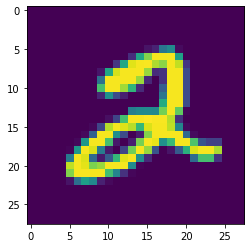

In [ ]:
plt.imshow(trainX[5].reshape(trainX[0].shape[:-1]))

# training

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=1e-3)

autoencoder.compile(loss='mse', optimizer=opt)

In [ ]:
hist = autoencoder.fit(trainX, trainX, epochs=5, batch_size=32, validation_data=(testX, testX))

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0556 - val_loss: 0.0211
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - val_loss: 0.0174
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - val_loss: 0.0174
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164 - val_loss: 0.0154
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0155 - val_loss: 0.0154


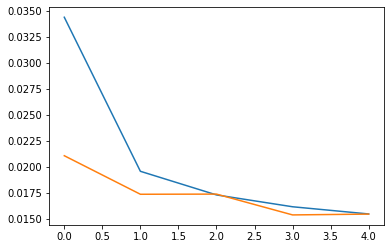

In [ ]:
n = np.arange(0, 5)
plt.figure()
plt.plot(n, hist.history['loss'])
plt.plot(n, hist.history['val_loss'])

# UNIFORM RANDOM ***VARIABLE***

In [ ]:
OMEGA1=tf.random.uniform(
    shape=[1,10], minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
OMEGA1.shape

TensorShape([1, 10])

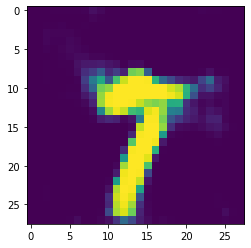

In [ ]:
o = decoder(OMEGA1)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))

In [ ]:
OMEGA2=tf.random.uniform(
    shape=[1,10], minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
OMEGA2.shape

TensorShape([1, 10])

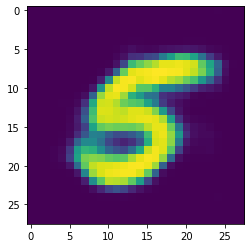

In [ ]:
o = decoder(OMEGA2)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))

In [ ]:
OMEGA3=tf.random.uniform(
    shape=[1,10], minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
OMEGA3.shape

TensorShape([1, 10])

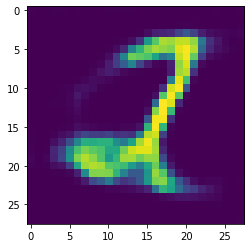

In [ ]:
o = decoder(OMEGA3)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))

In [ ]:
OMEGA4=tf.random.uniform(
    shape=[1,10], minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
OMEGA4.shape

TensorShape([1, 10])

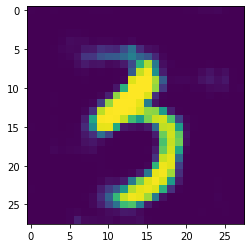

In [ ]:
o = decoder(OMEGA4)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))

In [ ]:
OMEGA5=tf.random.uniform(
    shape=[1,10], minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
OMEGA5.shape

TensorShape([1, 10])

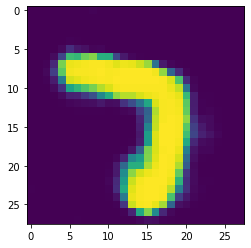

In [ ]:
o = decoder(OMEGA5)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))

# NORMAL RANDOM **VARIABLE** 

In [ ]:
OMEGA_NORMAL=tf.random.normal(
    shape=[1,10], mean=0.5, stddev=0.3, dtype=tf.dtypes.float32, seed=None, name=None)

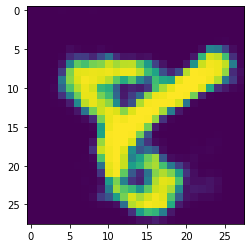

In [ ]:
o = decoder(OMEGA_NORMAL)
o = np.array(o)
plt.imshow(o.reshape(o.shape[1:-1]))